In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"ramen-ratings.csv")
df

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [5]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [6]:
df.tail(6)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2574,6,Vifon,Nam Vang,Pack,Vietnam,2.5,NaN
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN
2579,1,Westbrae,Miso Ramen,Pack,USA,0.5,NaN


In [7]:
df.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [9]:
shape = df.shape
shape

(2580, 7)

In [10]:
df.ndim

2

In [11]:
df.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [ ]:
*****************************(1)TOP 10 COUNTRIES IN WHICH RAMEN IS POPULAR BASED ON 5 STAR RATINGS*********************

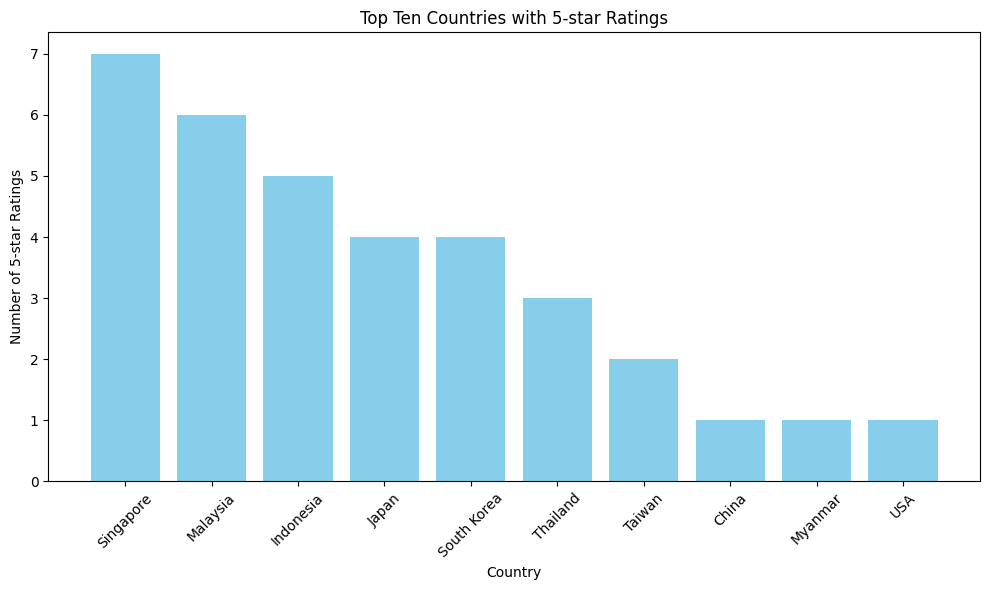

In [13]:
ramen_data = pd.read_csv("ramen-ratings.csv")
ramen_data.dropna(inplace=True)
five_star_ratings = ramen_data[ramen_data['Stars'] == '5']
top_countries = five_star_ratings.groupby('Country').size().reset_index(name='Count')
top_countries.sort_values(by='Count', ascending=False, inplace=True)

top_ten_countries = top_countries.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_ten_countries['Country'], top_ten_countries['Count'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of 5-star Ratings')
plt.title('Top Ten Countries with 5-star Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
---->Singapore has the highest number of 5-star ratings for ramen.Malaysia and Indonesia follow closely behind, followed by Japan, South Korea and so on.

In [ ]:
****************************(2)TOP 10 BRANDS OF RAMEN WHICH ARE POPULAR BASED ON 5 STAR RATING********************************

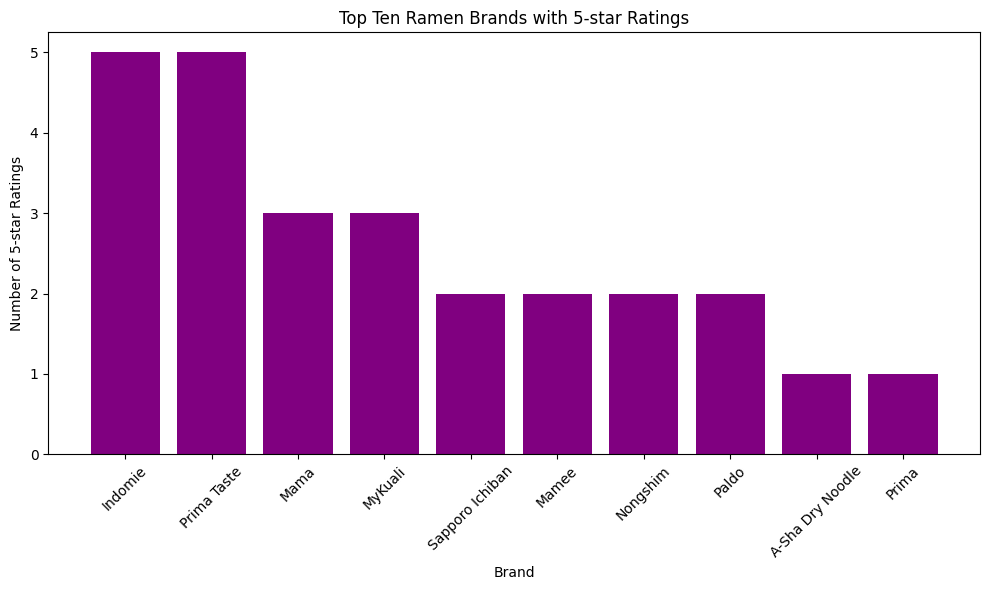

In [14]:
five_star_ratings = ramen_data[ramen_data['Stars'] == '5']
top_brands = five_star_ratings.groupby('Brand').size().reset_index(name='Count')
top_brands.sort_values(by='Count', ascending=False, inplace=True)
top_ten_brands = top_brands.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_ten_brands['Brand'], top_ten_brands['Count'], color='purple')
plt.xlabel('Brand')
plt.ylabel('Number of 5-star Ratings')
plt.title('Top Ten Ramen Brands with 5-star Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
---->Indomie and Prima Taste are the top ramen brands with the highest number of 5-star ratings, followed by Mama and Mykauli and so on

In [ ]:
********************************************(3)TOP 10 MOST COMMON RAMEN FLAVOURS*******************************

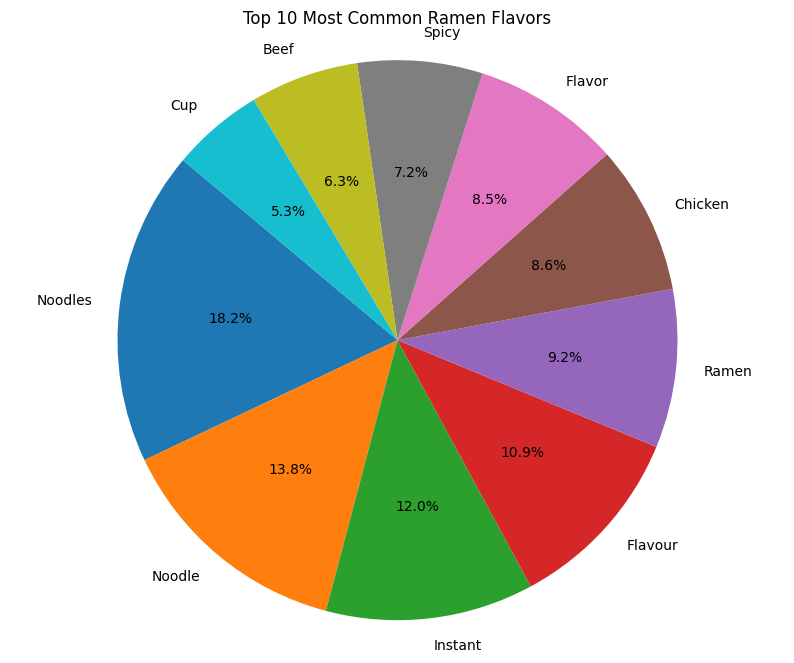

In [15]:
flavors = df['Variety'].str.split(' ', expand=True).stack()
top_flavors = flavors.value_counts().head(10)

plt.figure(figsize=(10, 8))
plt.pie(top_flavors, labels=top_flavors.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Top 10 Most Common Ramen Flavors')
plt.show()

In [ ]:
---->The most common ramen flavour is Noodles(18.2%) followed by noodle(13.8%),Instant(12.0%) and so on.

In [ ]:
*************************************(4)TOP 10 NUMBER OF RAMEN REVIEWS BASED ON COUNTRIES*********************************

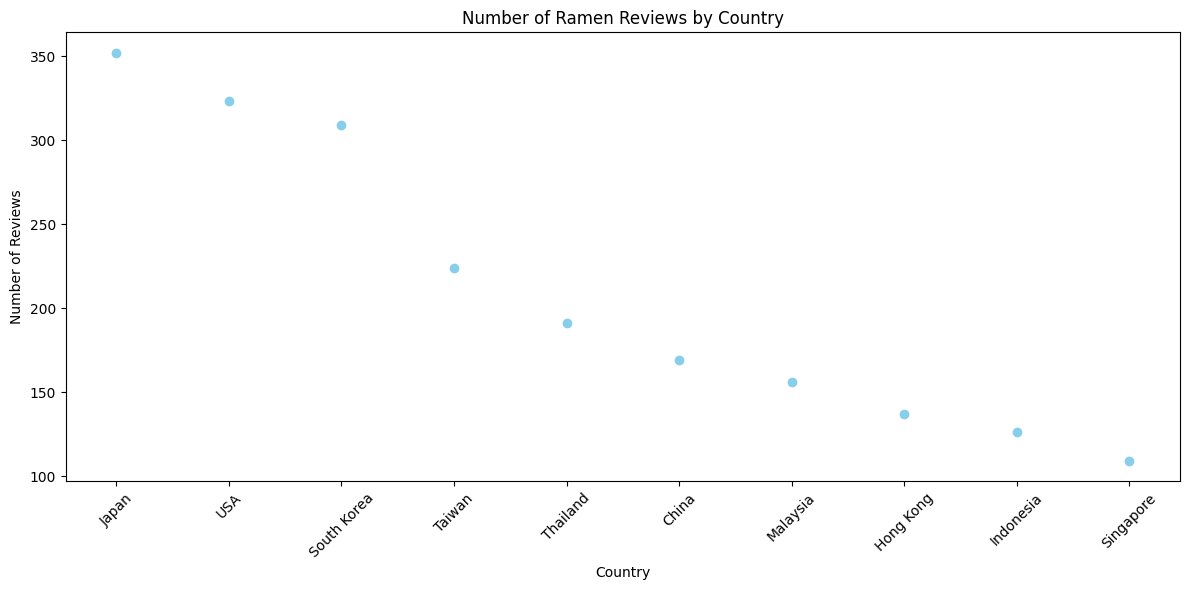

In [16]:
reviews_by_country = df['Country'].value_counts().reset_index()
reviews_by_country.columns = ['Country', 'Count']
reviews_by_country.sort_values(by='Count', ascending=False, inplace=True)
top_ten_countries = reviews_by_country.head(10)

plt.figure(figsize=(12, 6))
plt.scatter(top_ten_countries['Country'], top_ten_countries['Count'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.title('Number of Ramen Reviews by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
------>From this scatter plot JAPAN has the highest number of Ramen reviews followed by USA,SOUTH KOREA,TAIWAN and so on.

In [ ]:
*******************************************(5)AVERAGE RATING OF RAMEN BASED ON COUNTRIES***************************************

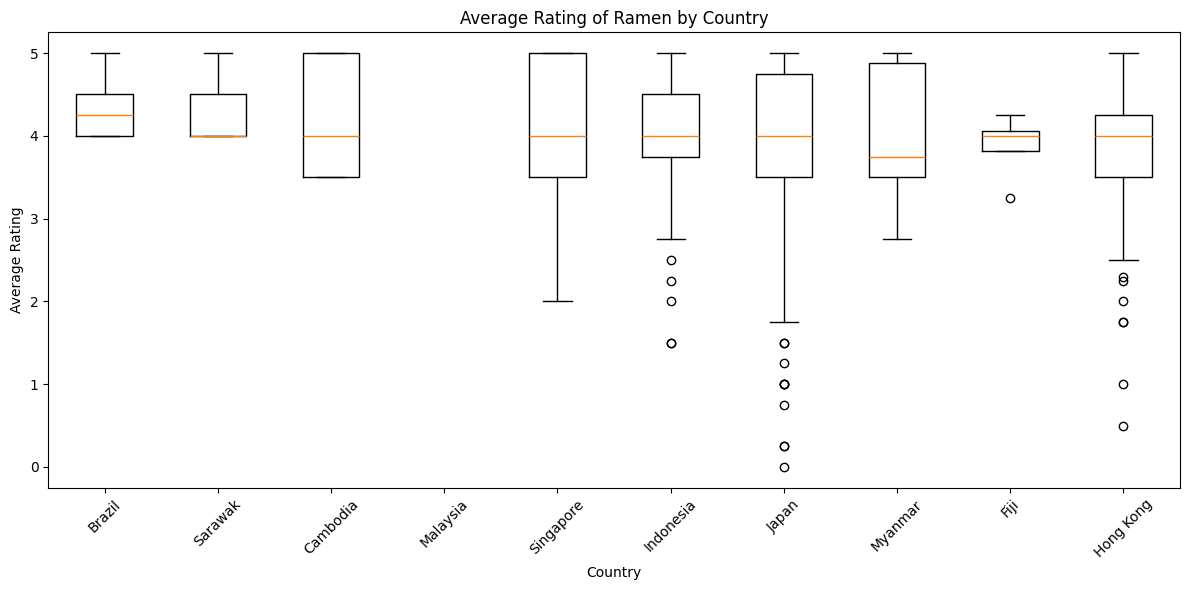

In [17]:
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')
avg_rating_by_country = df.groupby('Country')['Stars'].mean().reset_index()
avg_rating_by_country.sort_values(by='Stars', ascending=False, inplace=True)
top_ten_countries = avg_rating_by_country.head(10)

plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Country'] == country]['Stars'] for country in top_ten_countries['Country']], labels=top_ten_countries['Country'])
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.title('Average Rating of Ramen by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
------->From the box plot Brazil has the highest average rating followed closely by Sarawak and Cambodia.

In [ ]:
***************************************************(6)MOST PREFERRED RAMEN STYLES**********************************************

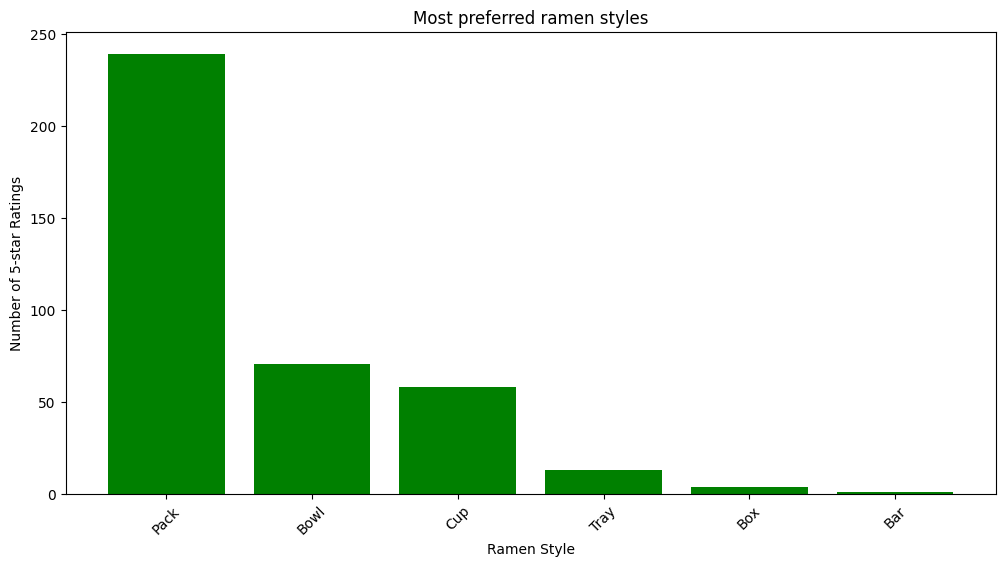

In [18]:
five_star_ratings = df[df['Stars'] == 5]
styles = five_star_ratings['Style'].str.split(',', expand=True).stack()
top_styles = styles.value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_styles.index, top_styles.values, color='green')
plt.xlabel('Ramen Style')
plt.ylabel('Number of 5-star Ratings')
plt.title('Most preferred ramen styles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
----->From the bar graph "pack" style is most preferred followed by "bowl" and "cup".

In [ ]:
******************************************(7)DENSITY DISTRIBUTIONS OF RAMEN RATINGS**********************************

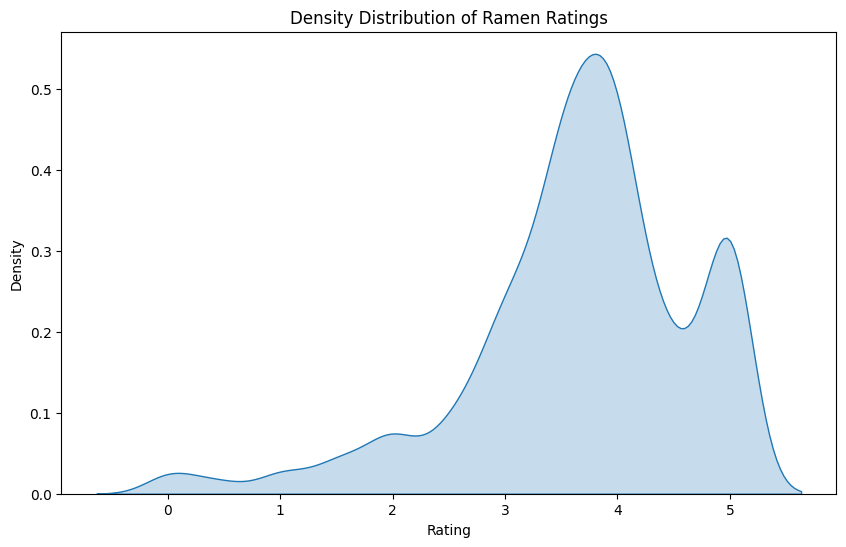

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Stars'], fill=True)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Density Distribution of Ramen Ratings')
plt.show()

In [ ]:
The plot of density of Stars shows that it is LEFT SKEWED which denotes thet majority of the ratings are higher.